# Data Exploration
Taking a look at the raw dataset that we have.

The `0-Data-Encoder.ipynb` file should have been run before this, and, as a result, the `encoded-data.csv` file should have been generated.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("../data/encoded-data.csv")
raw_df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,7.417366,0.000000,13.861341,14.981039,0.000000,0.000000,0.0,...,6.086682,0.0,23.732056,22.293385,9.553692,19.502905,0.000000,0.000000,0.0,0.0
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,5.675191,0.000000,23.251524,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,8.913853,0.000000,0.000000,0.000000,3.610444,0.0,0.0
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,0.0,2.274742,0.000000,14.187443,19.222454,0.000000,0.000000,0.0,...,11.562074,0.0,15.107138,26.871258,13.723278,8.678146,0.000000,0.000000,0.0,0.0
3,CHOPPER,e0f5a21b30c58316cb35ae10f902741e4a5d96b58a8bec...,0.0,0.020462,4.258008,12.089490,4.268348,1.260907,0.000000,0.0,...,3.573354,0.0,0.693656,13.252756,2.608040,14.509503,0.866587,0.000000,0.0,0.0
4,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,0.0,8.435247,11.025072,1.910951,2.756680,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,1.928727,3.386528,14.165046,1.996442,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,0.0,6.495442,8.065195,9.653446,2.007170,0.000000,0.000000,0.0,...,2.821582,0.0,0.000000,3.746993,0.000000,4.727379,0.000000,2.075920,0.0,0.0
2187,UNKNOWN,08b4e7389242e3b8c37215a3b972f69193a9a12d5130bf...,0.0,0.000000,5.558469,5.184574,11.103884,1.259823,3.237913,0.0,...,2.253992,0.0,1.774885,3.278591,6.783997,7.825532,2.897438,0.003519,0.0,0.0
2188,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,12.675972,0.000000,27.582960,0.000000,0.000000,0.000000,0.0,...,0.948577,0.0,9.169173,17.898558,4.945037,0.000000,0.000000,0.000000,0.0,0.0
2189,TRICKBOT,7eca38a5d0098a7ca4baa1faca43b80b5f911b7580273b...,0.0,21.505163,0.000000,19.722036,0.000000,0.000000,0.000000,0.0,...,2.144604,0.0,7.053920,10.256109,0.000000,5.395798,0.000000,0.000000,0.0,0.0


What is the distribution of each of the families?

In [3]:
raw_df["label"].value_counts()

label
UNKNOWN         389
TRICKBOT        114
COBALTSTRIKE     85
BENIGN           79
MIRAI            73
               ... 
BINDER            1
BLACKV            1
PISTOLAR          1
GETNOW            1
STEAM             1
Name: count, Length: 396, dtype: int64

Remove the `UNKNOWN` class.

In [4]:
df = raw_df[raw_df["label"] != "UNKNOWN"].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,7.417366,0.000000,13.861341,14.981039,0.000000,0.000000,0.0,...,6.086682,0.0,23.732056,22.293385,9.553692,19.502905,0.000000,0.000000,0.0,0.0
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,5.675191,0.000000,23.251524,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,8.913853,0.000000,0.000000,0.000000,3.610444,0.0,0.0
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,0.0,2.274742,0.000000,14.187443,19.222454,0.000000,0.000000,0.0,...,11.562074,0.0,15.107138,26.871258,13.723278,8.678146,0.000000,0.000000,0.0,0.0
3,CHOPPER,e0f5a21b30c58316cb35ae10f902741e4a5d96b58a8bec...,0.0,0.020462,4.258008,12.089490,4.268348,1.260907,0.000000,0.0,...,3.573354,0.0,0.693656,13.252756,2.608040,14.509503,0.866587,0.000000,0.0,0.0
4,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,0.0,8.435247,11.025072,1.910951,2.756680,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,1.928727,3.386528,14.165046,1.996442,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,DRIDEX,95deb6a8dd79ab42df904e0383ddc96cd30ce9f5da4ba8...,0.0,9.382783,4.581702,2.148845,13.126667,0.000000,0.000000,0.0,...,4.992890,0.0,22.065388,7.085610,7.298818,15.700541,0.000000,0.000000,0.0,0.0
1798,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,0.0,6.495442,8.065195,9.653446,2.007170,0.000000,0.000000,0.0,...,2.821582,0.0,0.000000,3.746993,0.000000,4.727379,0.000000,2.075920,0.0,0.0
1799,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,12.675972,0.000000,27.582960,0.000000,0.000000,0.000000,0.0,...,0.948577,0.0,9.169173,17.898558,4.945037,0.000000,0.000000,0.000000,0.0,0.0
1800,TRICKBOT,7eca38a5d0098a7ca4baa1faca43b80b5f911b7580273b...,0.0,21.505163,0.000000,19.722036,0.000000,0.000000,0.000000,0.0,...,2.144604,0.0,7.053920,10.256109,0.000000,5.395798,0.000000,0.000000,0.0,0.0


Keep only the samples whose label have at least `KEEP_THRESHOLD` occurences.

In [5]:
KEEP_THRESHOLD = 5

counts = df["label"].value_counts(dropna=False) 
keep_labels = counts[counts >= KEEP_THRESHOLD].index
df = df[df["label"].isin(keep_labels)].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,7.417366,0.000000,13.861341,14.981039,0.0,0.0,0.0,...,6.086682,0.0,23.732056,22.293385,9.553692,19.502905,0.000000,0.000000,0.0,0.0
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,5.675191,0.000000,23.251524,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,8.913853,0.000000,0.000000,0.000000,3.610444,0.0,0.0
2,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,0.0,8.435247,11.025072,1.910951,2.756680,0.0,0.0,0.0,...,0.000000,0.0,0.000000,1.928727,3.386528,14.165046,1.996442,0.000000,0.0,0.0
3,HIVE,122e397dc3a55143bd276d6ff3bc04a05601fbf390aa52...,0.0,7.161143,7.466067,0.000000,12.057423,0.0,0.0,0.0,...,2.785359,0.0,6.948788,0.000000,10.238041,7.976179,0.000000,0.685886,0.0,0.0
4,REMCOS,30a9e1ca1e35bc557d6b46109822cb6d0a0cf970fb614e...,0.0,13.437019,6.879735,5.775038,0.000000,0.0,0.0,0.0,...,0.000000,0.0,10.821386,22.139019,0.000000,6.127213,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,0.0,6.819577,13.081622,3.350442,21.139126,0.0,0.0,0.0,...,9.952506,0.0,10.925339,2.663227,3.490541,3.282700,0.000000,0.000000,0.0,0.0
1265,DRIDEX,95deb6a8dd79ab42df904e0383ddc96cd30ce9f5da4ba8...,0.0,9.382783,4.581702,2.148845,13.126667,0.0,0.0,0.0,...,4.992890,0.0,22.065388,7.085610,7.298818,15.700541,0.000000,0.000000,0.0,0.0
1266,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,0.0,6.495442,8.065195,9.653446,2.007170,0.0,0.0,0.0,...,2.821582,0.0,0.000000,3.746993,0.000000,4.727379,0.000000,2.075920,0.0,0.0
1267,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,12.675972,0.000000,27.582960,0.000000,0.0,0.0,0.0,...,0.948577,0.0,9.169173,17.898558,4.945037,0.000000,0.000000,0.000000,0.0,0.0


What is the distribution of classes now?

<Axes: xlabel='count', ylabel='label'>

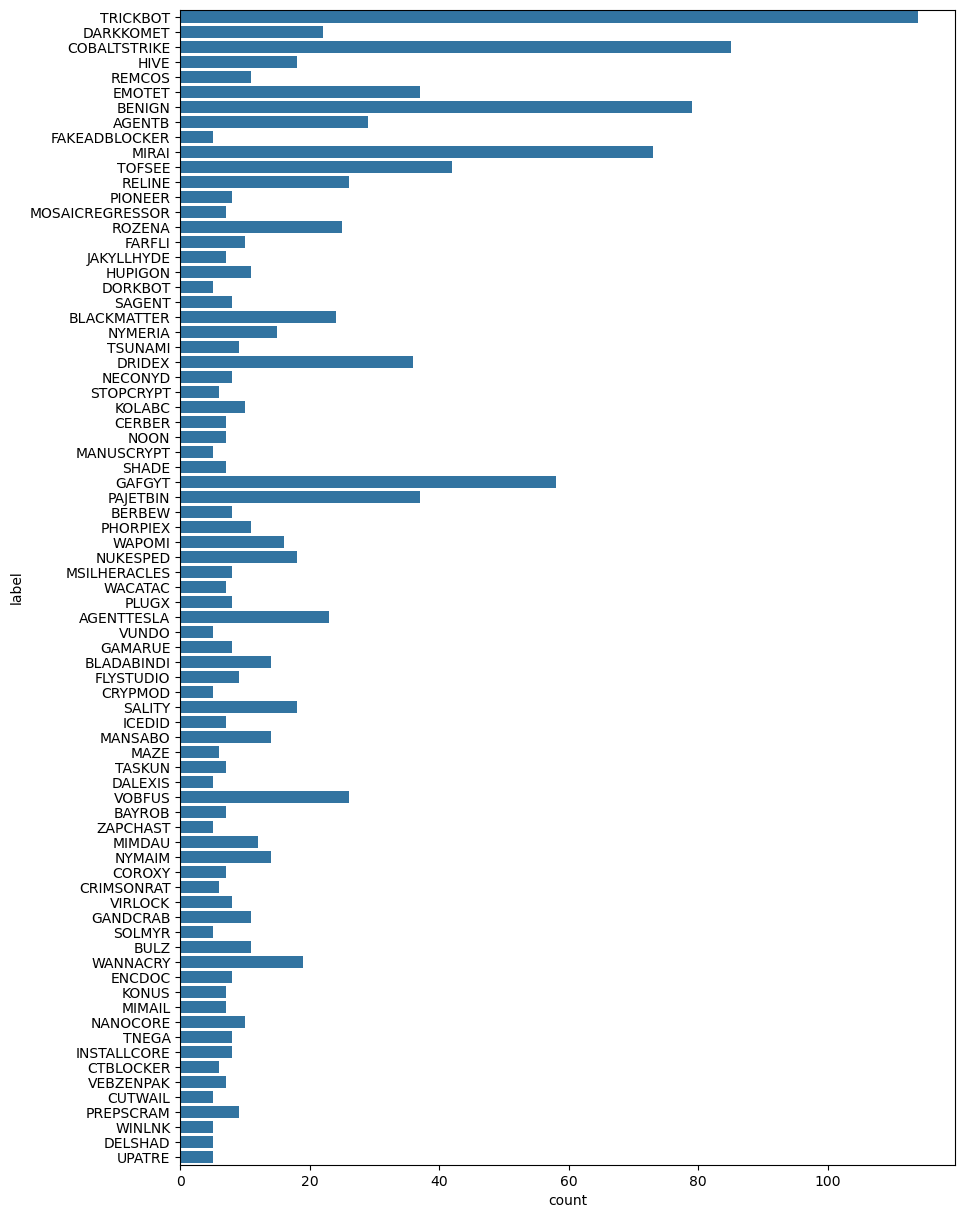

In [6]:
plt.figure(figsize = (10, 15))
sns.countplot(data=df["label"])

Save the updated data.

In [7]:
df.to_csv("../data/processed-data.csv", index=False)